<a href="https://colab.research.google.com/github/6hAkunAmAtAtA9/Neural_pathway/blob/main/1_Work_of_one_neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 часть. Делаю один нейрон. Что может быть проще и понятнее :) На вход подается одно число. Цель: определить является ли входноле число число больше 5

## Один вход, один нейрон

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.random.randint(10, size=50)
y_train = (x_train > 5) * 1
print(x_train[:5])
print(y_train[:5])

[5 2 8 3 1]
[0 0 1 0 0]


In [ ]:
weight = np.random.random()
weight

0.3057443420851018

In [ ]:
total_error = []
total_weights = []
for iter in range(10):
  # print(f'***ITER: {iter}***') 
  total_weights.append(weight)
  error = []
  for i in range(len(x_train)):
    # Прогноз - произведение входного значения и весов нейрона
    pred = x_train[i] * weight
    # Ошибка - квадратичная разность между выходом нейрона и ожидаемым значением (целью)
    error.append((y_train[i] - pred) ** 2)
    # Дельта - величина на которую ошибается нейрон. Знак минус: Предсказываемая величина завышена
    # Знак плюс: Величина занижена
    delta = y_train[i] - pred
    # Корректировка веса нейрона на величину дельта, для изменени предсказания в сторону цели
    weight += delta * 0.01 # Нельзя уменьшить вес на большую дельту, введем уменьшающий коэффициент
  # print(f'ERROR: {np.mean(np.array(error))}')
  total_error.append(np.mean(np.array(error)))

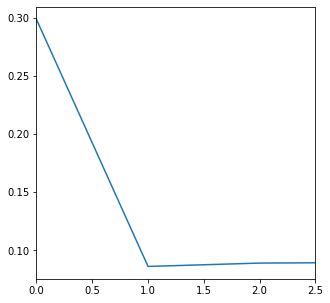

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(total_error)
plt.xlim((0,2.5))
plt.show()

In [ ]:
for input in range(1, 11):
  pred = input * weight
  error = ((input > 5) - pred) ** 2
  print(f'INPUT: {input}, PRED: {round(pred, 2)}, ERROR: {round(error, 2)}')

INPUT: 1, PRED: 0.1, ERROR: 0.01
INPUT: 2, PRED: 0.19, ERROR: 0.04
INPUT: 3, PRED: 0.29, ERROR: 0.08
INPUT: 4, PRED: 0.38, ERROR: 0.15
INPUT: 5, PRED: 0.48, ERROR: 0.23
INPUT: 6, PRED: 0.58, ERROR: 0.18
INPUT: 7, PRED: 0.67, ERROR: 0.11
INPUT: 8, PRED: 0.77, ERROR: 0.05
INPUT: 9, PRED: 0.86, ERROR: 0.02
INPUT: 10, PRED: 0.96, ERROR: 0.0


Нейрон понял, что для минимизации ошибки  ему нужно уменьшать входное значение в 10 раз. Это единственной, что он делает. Добавлю свою первую функцию активации для нейрона.

Проведу все то же самое, но со ступенчатой функцией активации.

In [ ]:
weight = np.random.random()
weight

0.27137589513645555

In [ ]:
total_error = []
total_weights = []
for iter in range(10):

  total_weights.append(weight)
  error = []
  for i in range(len(x_train)):

    pred = ((x_train[i] * weight) > 0.5) * 1
    error.append((y_train[i] - pred) ** 2)
    delta = y_train[i] - pred
    weight += delta * 0.01 

  total_error.append(np.mean(np.array(error)))

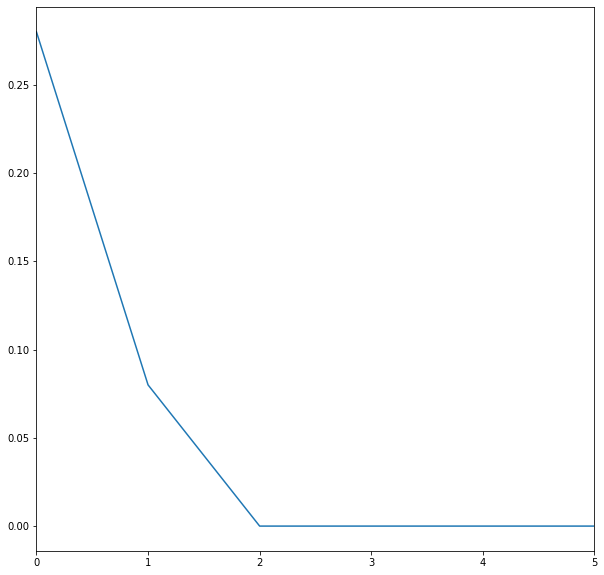

In [ ]:
plt.figure(figsize=(10, 10)); plt.xlim((0,5))
plt.plot(total_error); plt.show()

In [ ]:
for input in range(1, 11):
  pred = ((input * weight) > 0.5) * 1
  error = ((input > 5) - pred) ** 2
  print(f'INPUT: {input}, PRED: {round(pred, 2)}, ERROR: {round(error, 2)}')

INPUT: 1, PRED: 0, ERROR: 0
INPUT: 2, PRED: 0, ERROR: 0
INPUT: 3, PRED: 0, ERROR: 0
INPUT: 4, PRED: 0, ERROR: 0
INPUT: 5, PRED: 0, ERROR: 0
INPUT: 6, PRED: 1, ERROR: 0
INPUT: 7, PRED: 1, ERROR: 0
INPUT: 8, PRED: 1, ERROR: 0
INPUT: 9, PRED: 1, ERROR: 0
INPUT: 10, PRED: 1, ERROR: 0


In [ ]:
weight

0.09137589513645544

Единственное, что делает вес нейрона - это уменьшает входное значение в 10 раз. Все остальное делает функкция актвивации, активирующая нейрон когда на входе значение больше 0.5. Такая же функия применялась и для формирования меток y. На графиках можно заметить что с функицей активации нейрон учился в два раза медленнее. 

# Два входа, один нейрон


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = np.random.randint(10, size=(100, 2))
y_train = []
for i in range(len(x_train)):
  y_train.append(1 if (x_train[i][0] + x_train[i][1]) >= 13 else 0)
y_train = np.array(y_train)

In [ ]:
y_train.mean()

0.21

In [ ]:
#Здесь сразу же напишу ступенчатую функцию активации
def more_than(x):
  return (x > 0.5) * 1

In [ ]:
weights = np.random.random(size=(2,1)) # Сейчас у нас имеется два входа, значит и весов должно быть два
weights

array([[0.66573971],
       [0.6649115 ]])

In [ ]:
total_error = []
total_weights = []
for iter in range(10):
  round_error = []
  for i in range(len(x_train)):
    pred = more_than(x_train[i].dot(weights))
    error = (y_train[i] - pred) ** 2
    round_error.append(error)
    delta = y_train[i] - pred
    weights += delta * 0.1 
    # print(f'PRED: {pred}, ERROR: {error}, DELTA: {delta}, W: {weights}')
    # print(f'R_ERROR: {np.mean(np.array(round_error))}')
  total_error.append(np.array(round_error).mean())

In [ ]:
total_error

[0.25, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2]

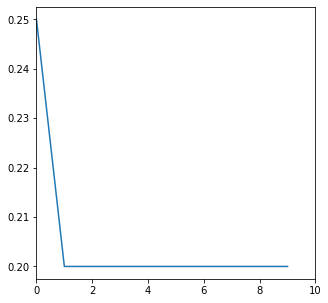

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(total_error)
plt.xlim((0,10))
plt.show()

По графику ошибки видно, что обучение одного нейрона не дает результата. Происходит постоянная корректировка весов, однако, точность не увеличивается.

In [ ]:
x_test = np.random.randint(10, size=(10, 2))
y_test = []
for i in range(len(x_test)):
  y_test.append(1 if (x_test[i][0] + x_test[i][1]) >= 13 else 0)
y_test = np.array(y_test)

In [ ]:
for id in range(len(x_test)):
  pred = more_than(x_train[id].dot(weights))
  error = (y_test[id] - pred) ** 2
  
  print(f'INPUT: {x_test[id]}, Y: {y_test[id]}, PRED: {np.around(pred, decimals=2)}, ERROR: {np.around(error, decimals=2)}')

INPUT: [9 5], Y: 1, PRED: [0], ERROR: [1]
INPUT: [3 2], Y: 0, PRED: [0], ERROR: [0]
INPUT: [0 6], Y: 0, PRED: [0], ERROR: [0]
INPUT: [5 0], Y: 0, PRED: [0], ERROR: [0]
INPUT: [1 0], Y: 0, PRED: [0], ERROR: [0]
INPUT: [2 1], Y: 0, PRED: [0], ERROR: [0]
INPUT: [9 4], Y: 1, PRED: [0], ERROR: [1]
INPUT: [6 5], Y: 0, PRED: [0], ERROR: [0]
INPUT: [6 9], Y: 1, PRED: [0], ERROR: [1]
INPUT: [1 8], Y: 0, PRED: [0], ERROR: [0]


В настоящий момент, у меня не получилось обучить один нейрон понимать является ли сумма входных значений больше заданного числа или нет. Отсутствуйет явно выраженная корреляция между входным значениями и целью. Нейрон понял что наименьшая ошибка получается, если всегда выдавать 0, что неудивительно